In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
datau=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ocn1/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0154-10.SSH.nc')
plotvaru = datau.variables['SSH'][0,:,:]
lontu = datau.variables['TLONG'][:,:]
lattu = datau.variables['TLAT'][:,:]
plotvaru[plotvaru == -1.0] = np.nan
#plotvaru[plotvaru >  1000] = np.nan

In [3]:
lont0 = lontu[260,1050] 
latt0 = lattu[260,1050]
lont1 = lontu[230,970]
latt1 = lattu[230,970]
lont2 = lontu[190,900]
latt2 = lattu[190,900]
lont3 = lontu[200,800]
latt3 = lattu[200,800]
lont4 = lontu[220,710] 
latt4 = lattu[220,710]
lont5 = lontu[260,670] 
latt5 = lattu[260,670]
lont6 = lontu[300,630] 
latt6 = lattu[300,630]
lont7 = lontu[340,660] 
latt7 = lattu[340,660]
lont8 = lontu[380,690] 
latt8 = lattu[380,690]
lont9 = lontu[410,720] 
latt9 = lattu[410,720]
lont10 = lontu[450,750]
latt10 = lattu[450,750]
lont11 = lontu[450,780]
latt11 = lattu[450,780]
lont12 = lontu[460,810]
latt12 = lattu[460,810]

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: The following kwargs were not used by contour: 'spacing'
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


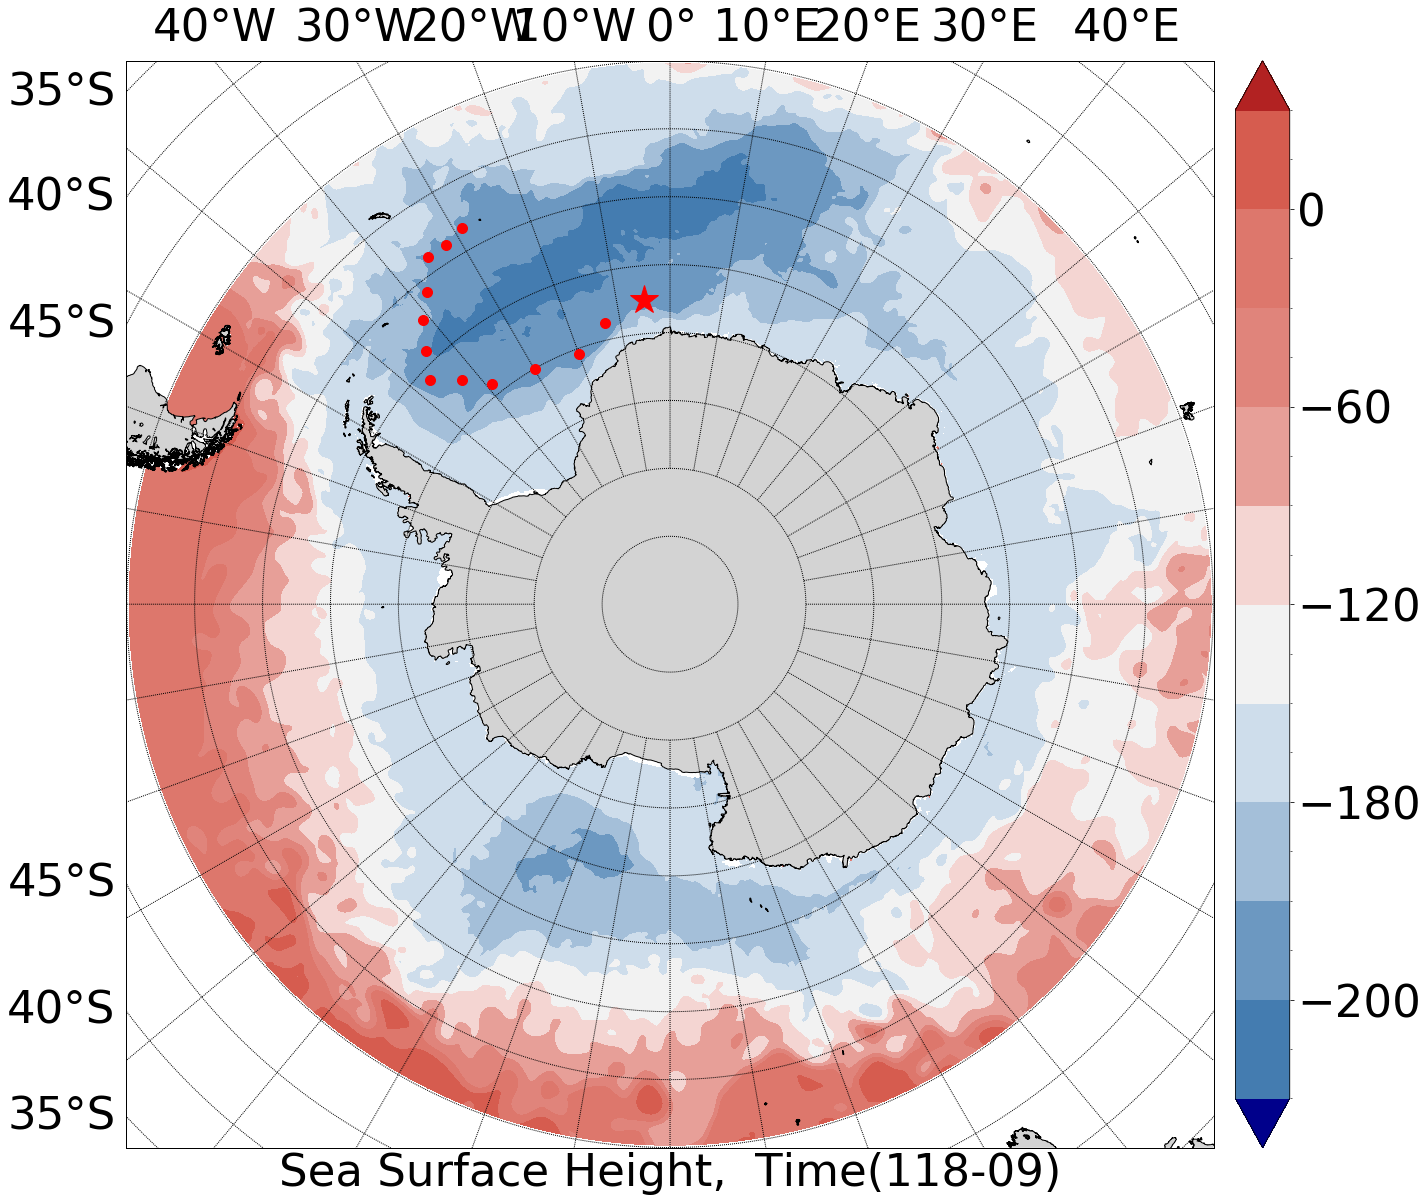

In [4]:
nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([1,30,70,90,100,130,150,170,190,210,220,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [-210,-200,-190,-180,-150,-120,-90,-60,-30,0,30]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'45'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 0,area_thresh = 100,\
                     width = 8900000,height = 8900000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lontu,lattu)
#CP = map.contourf(x,y,A3,range(-2,3),cmap = nice_cmap,extend='both')

CP = map.contourf(x,y,plotvaru,cmap = new_cmap,norm =norm,spacing = 'uniform',levels = nice_levels,extend='both')

x0,y0=map(lont0,latt0)
map.plot(x0,y0,'*r',markersize=30)

x1,y1=map(lont1,latt1)
map.plot(x1,y1,'or',markersize=10)
x2,y2=map(lont2,latt2)
map.plot(x2,y2,'or',markersize=10)
x3,y3=map(lont3,latt3)
map.plot(x3,y3,'or',markersize=10)
x4,y4=map(lont4,latt4)
map.plot(x4,y4,'or',markersize=10)
x5,y5=map(lont5,latt5)
map.plot(x5,y5,'or',markersize=10)
x6,y6=map(lont6,latt6)
map.plot(x6,y6,'or',markersize=10)
x7,y7=map(lont7,latt7)
map.plot(x7,y7,'or',markersize=10)
x8,y8=map(lont8,latt8)
map.plot(x8,y8,'or',markersize=10)
x9,y9=map(lont9,latt9)
map.plot(x9,y9,'or',markersize=10)
x10,y10=map(lont10,latt10)
map.plot(x10,y10,'or',markersize=10)

x11,y11=map(lont11,latt11)
map.plot(x11,y11,'or',markersize=10)
x12,y12=map(lont12,latt12)
map.plot(x12,y12,'or',markersize=10)



CP.cmap.set_over('firebrick')
CP.cmap.set_under('darkblue')
#map.drawmeridians([3,-67],[3,-62],'purple',linestyles = 'solid',linewidths=3)
#CS=map.contour(map([2],[-67]),colors = 'b', linestyles = 'solid',linewidths=3)
#CS=map.contour(x,y,A3,[700],colors = 'r', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, inline=0.1, fontsize=30)
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
#cbar = fig.colorbar(pos_neg_clipped, ax=ax3, extend='both')
cbar =map.colorbar(CP)
cbar.minorticks_on()
cbar.ax.tick_params(labelsize=45) 
#cbar.set_label('(1/day)', **my_font)
plt.xlabel("Sea Surface Height,  Time(118-09)",**my_font)
plt.savefig("Sea-ice Vorticity 118-09new.png")